<div class= 'span5 alert alert-success'>

##### Modeling

**Objective**: </br>
Build two to three different models and identify the best one. . Review the types of models that would be appropriate given your modeling response and the features in your dataset and build two to three models. In addition to considering different algorithm types in your model selection, also consider applying model hyperparameter tuning operations. </br>


 **Techniques** <br>
- modeling 
- reivew outcome by using standard model evaluation metrics (accuracy, recall , R^2)
- Identify the final model that you think is the best model for this project
  

</div>

In [1]:
# to load data 
import pandas as pd
clean_data_train = pd.read_csv('../Pre-processing/coffee_data_converted_cleaned_dummy_scaled_train.csv')
clean_data_train.head()

clean_data_train.isnull().sum()

clean_data_test = pd.read_csv('../Pre-processing/coffee_data_converted_cleaned_dummy_scaled_test.csv')
clean_data_test.head()

clean_data_test.isnull().sum()


title                        0
roaster                      0
score                        0
Roaster Location             0
Review Date                  0
Aroma                        0
Acidity/Structure            0
Body                         0
Flavor                       0
Aftertaste                   0
coffee_name                  0
region_africa_arabia         0
region_caribbean             0
region_central_america       0
region_hawaii                0
region_asia_pacific          0
is_blend                     0
Est. Price USD               0
Latitude                     0
Longitude                    0
January_Avg_Temp             0
January_Precipitation        0
July_Avg_Temp                0
July_Precipitation           0
Est. Price USD_per_ounce     0
region                      59
whole-bean_Agtron            0
ground-bean_Agtron           0
Roast Level_Dark             0
Roast Level_Light            0
Roast Level_Medium           0
Roast Level_Medium-Dark      0
Roast Le

In [2]:
# split data into train and test dataset
# import libraries
from sklearn.model_selection import train_test_split



# define (train) target variable
y_train = clean_data_train['score']

# define (train) features X
X_train = clean_data_train.drop(columns=['score', 'title', 'roaster', 'Roaster Location', 'Review Date', 'coffee_name', 'Est. Price USD', 'region'])


# define (test) target variable
y_test = clean_data_test['score']

# define (test) features X
X_test = clean_data_test.drop(columns=['score', 'title', 'roaster', 'Roaster Location', 'Review Date', 'coffee_name', 'Est. Price USD', 'region'])





Since this is a prection analysis, the targert variable is score.
Here are the models that would be used in this project.
- Linear regrssion
- DecisionTreeRegressor
- XGoster
- Multi-Layer Perceptron Regression (MLP)



##### Model 1: Linear Regression

In [3]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV

#no hyper parameter for linear regression, only fit_intercept
param_grid = {'fit_intercept': [True]}

# specify the scoring metrics
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error'
}

#  create GridSearchCV 
grid_search = GridSearchCV(
    LinearRegression(),
    param_grid=param_grid,
    cv=5, # 5 fold cross validation
    scoring=scoring,
    refit='r2'
)
# fit the model
grid_search.fit(X_train, y_train)


# training dataset performance
print("In training dataset:")
print("The best parameter of Simple Linear Regression using grid search is:", grid_search.best_params_)
print("The best score of Simple Linear Regression using grid search is:", grid_search.best_score_)

# test dataset performance
print("\nIn test dataset:")
predictions = grid_search.predict(X_test)

print("The best parameter of Simple Linear Regression using grid search is:", grid_search.best_params_)
print("The best score of Simple Linear Regression using grid search is:", grid_search.best_score_)



In training dataset:
The best parameter of Simple Linear Regression using grid search is: {'fit_intercept': True}
The best score of Simple Linear Regression using grid search is: 0.9962683830924645

In test dataset:
The best parameter of Simple Linear Regression using grid search is: {'fit_intercept': True}
The best score of Simple Linear Regression using grid search is: 0.9962683830924645


According to the result, R2 socre of the test dataset in 5-fold validation is 0.9967294106040567, which is a very high score. Thus, I would like to see if Ridge regression could fit the overfitting problem.




In [4]:
from sklearn.metrics import mean_squared_error, r2_score as r2_score_metric  # rename r2_socre_metric
from sklearn.linear_model import Ridge 

ridge_model = Ridge(alpha=0.001)
ridge_model.fit(X_train, y_train)


# predict the test set
ridge_pred = ridge_model.predict(X_test)
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge R2:", r2_score_metric(y_test, ridge_pred))



Ridge MSE: 0.012673099925438443
Ridge R2: 0.9944925749143697


In [5]:
from sklearn.metrics import mean_squared_error, r2_score as r2_score_metric  # rename r2_socre_metric
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV
# Ridge Regression
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]
}
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error'
}

grid_search1= GridSearchCV(
    Ridge(),
    param_grid = param_grid,
    cv = 5,
    scoring=scoring,
    refit='r2'
    
    )

# training dataset to fit the model
grid_search1.fit(X_train, y_train)

print("In training dataset:")
print("The best parameter of Ridge Linear Regression using grid search is:", grid_search1.best_params_)
print("The best R2 score of Ridge Linear Regression using grid search is:", grid_search1.best_score_)


# to print the predictions - test dataset
print("\nIn test dataset:")
predictions = grid_search1.predict(X_test)


for alpha in param_grid['alpha']:
    
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    print(f"Alpha = {alpha} in test dataset R2：", r2_score_metric(y_test, test_pred))
    
predictions = grid_search1.predict(X_test)

print("\nThe best alpha value is:", grid_search1.best_params_)
best_r2_ridge = r2_score_metric(y_test, predictions)
best_mse_ridge = mean_squared_error(y_test, predictions)
print("The best R2 score of Ridge Linear Regression using grid search is:", best_r2_ridge)
print("The best MSE of Ridge Linear Regression using grid search is::", best_mse_ridge)



In training dataset:
The best parameter of Ridge Linear Regression using grid search is: {'alpha': 0.001}
The best R2 score of Ridge Linear Regression using grid search is: 0.9962683664557144

In test dataset:
Alpha = 0.001 in test dataset R2： 0.9944925749143697
Alpha = 0.01 in test dataset R2： 0.9944924557938394
Alpha = 0.1 in test dataset R2： 0.9944911875167349
Alpha = 1 in test dataset R2： 0.994472177132382
Alpha = 10 in test dataset R2： 0.993792804321886

The best alpha value is: {'alpha': 0.001}
The best R2 score of Ridge Linear Regression using grid search is: 0.9944925749143697
The best MSE of Ridge Linear Regression using grid search is:: 0.012673099925438443


After using Ridge regression with 5 fold cross valation, the best paremater is 0.001 and R^2 score is 0.9967.

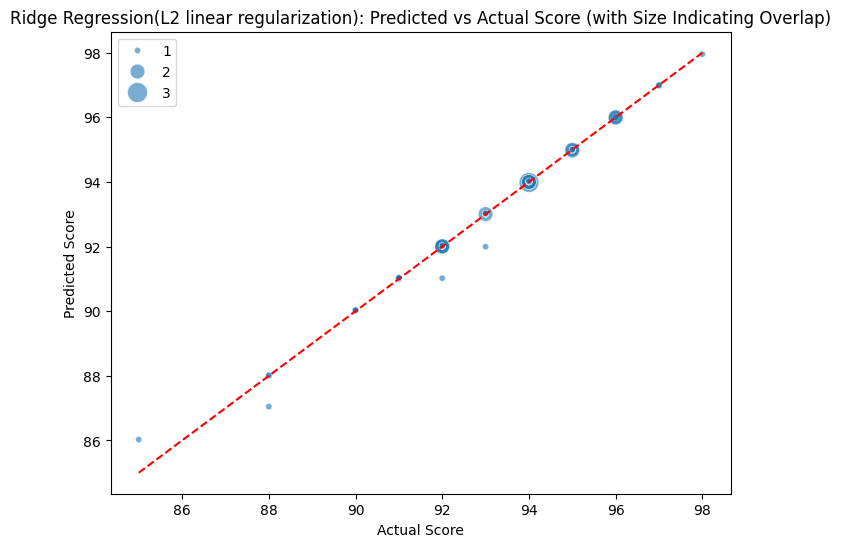

In [6]:
# to see the Linear Regression model performance by scatter plot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# calculate the number of points in the scatter plot
unique_points, counts = np.unique(list(zip(y_test, predictions)), axis=0, return_counts=True)

# plot the scatter plot, use `size` to represent the number of points
plt.figure(figsize=(8, 6))
sns.scatterplot(x=unique_points[:, 0], y=unique_points[:, 1], size=counts, sizes=(20, 200), alpha=0.6)

# reference line (ideal situation is y_pred = y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Ridge Regression(L2 linear regularization): Predicted vs Actual Score (with Size Indicating Overlap)")

plt.show()



In the scatter plot, X-axis show the real value in test dataset and y-axis shows the prediction dataset. Thus, the idea situation is the red line which means real value equal to the prediction value. </br>

From the plot, we can see that most of plots are closed to red line. This indicates a strong correlation between predicted and actual values. </br>

A few points are slightly deviate from the red line, however the deviation is small(approximately within +1 ~ -1).  </br>

In coclusion: The plot shows good model performance with high accuaracte prediction values close to the actual values. The minimal deviations and consistent pattern along the ideal line indicate a reliable predictive model.


##### Model 2: Decision Tree Regressior

In [7]:
# Simple DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2_score_metric

# create the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

dt_model.fit(X_train, y_train)


# predict the test set
y_pred_dt = dt_model.predict(X_test)

# calculate the MSE, R2-score
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score_metric(y_test, y_pred_dt)

print(f"Decision Tree MSE: {mse_dt}")
print(f"Decision Tree R2-score: {r2_dt}")

Decision Tree MSE: 0.03180482069370959
Decision Tree R2-score: 0.9861783882110082


In [8]:
# use the grid search to find the best parameter
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
}
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error'
}

grid_search2 = GridSearchCV(
    DecisionTreeRegressor(),
    param_grid,
    cv=5,
    scoring=scoring,
    refit='r2'
)

grid_search2.fit(X_train, y_train)

print("In training dataset:")
print("The best parameter of Decision Tree Regressor using grid search is:", grid_search2.best_params_)
print("The best score of Decision Tree Regressor using grid search is:", grid_search2.best_score_)

print("\nIn test dataset:")
predictions = grid_search2.predict(X_test)

best_r2_dt = r2_score_metric(y_test, predictions)
best_mse_dt = mean_squared_error(y_test, predictions)
print("The best parameter of Decision Tree Regressor using grid search is:", grid_search2.best_params_)
print("The best R2 score of Decision Tree Regressor using grid search is:", best_r2_dt)
print("The best MSE of Decision Tree Regressor using grid search is:", best_mse_dt)





In training dataset:
The best parameter of Decision Tree Regressor using grid search is: {'max_depth': 8}
The best score of Decision Tree Regressor using grid search is: 0.9820837613760002

In test dataset:
The best parameter of Decision Tree Regressor using grid search is: {'max_depth': 8}
The best R2 score of Decision Tree Regressor using grid search is: 0.9831223980234324
The best MSE of Decision Tree Regressor using grid search is: 0.03883693977225273


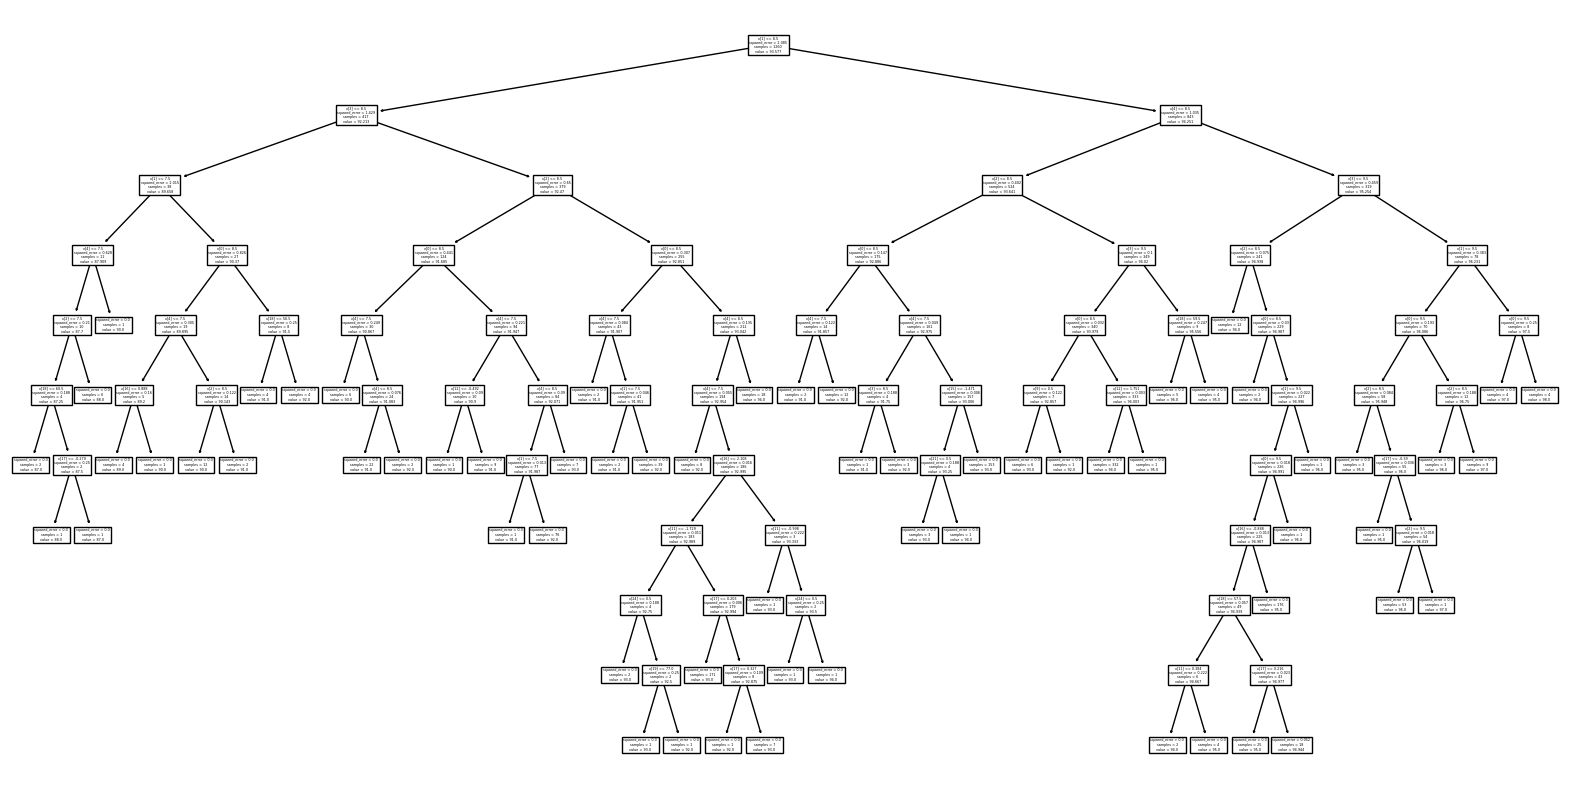

In [9]:
# plot the decision tree
import sklearn
from sklearn import tree
plt.figure(figsize=(20, 10))
sklearn.tree.plot_tree(dt_model)
plt.show()

##### Model 3: XGBoost

In [10]:
#!pip install xgboost

In [11]:
# XGBoost
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# predict the test set
y_pred_xgb = xgb_model.predict(X_test)

print(f"XGBoost MSE: {mean_squared_error(y_test, y_pred_xgb)}")
print(f"XGBoost R2-score: {r2_score_metric(y_test, y_pred_xgb)}")



XGBoost MSE: 0.027495670228982198
XGBoost R2-score: 0.9880510415875952


In [12]:
# XGBoost using grid search to find the best parameter
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV



param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# to specify multiple scoring metrics (r2 and mse)
scoring = {
    'r2': 'r2',
    'mse': 'neg_mean_squared_error'
}

grid_search3 = GridSearchCV(
    XGBRegressor(random_state = 42),
    param_grid,
    cv=5,
    scoring=scoring,
    refit='r2'  # use r2 score to select the best model
)

grid_search3.fit(X_train, y_train)
print("In training dataset:")
print("The best parameter of XGBoost using grid search is:", grid_search3.best_params_)
print("The best score of XGBoost using grid search is:", grid_search3.best_score_)

print("\nIn test dataset:")
predictions = grid_search3.predict(X_test)

best_r2_xgb = r2_score_metric(y_test, predictions)
best_mse_xgb = mean_squared_error(y_test, predictions)
print("The best parameter of XGBoost using grid search is:", grid_search3.best_params_)
print("The best R2 score of XGBoost using grid search is:", best_r2_xgb)
print("The best MSE of XGBoost using grid search is:", best_mse_xgb)


In training dataset:
The best parameter of XGBoost using grid search is: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
The best score of XGBoost using grid search is: 0.9924835833158454

In test dataset:
The best parameter of XGBoost using grid search is: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
The best R2 score of XGBoost using grid search is: 0.9866944148595147
The best MSE of XGBoost using grid search is: 0.03061739514020109


##### Model 4: MLP(Multi-Layer Perceptron Regression)

In [13]:
# MLP
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(    hidden_layer_sizes=(100,), 
    max_iter=1000,             
    random_state=42,            
    learning_rate_init=0.001   
)
mlp_model.fit(X_train, y_train)

y_pred_mlp = mlp_model.predict(X_test)

# calculate the MSE, R2-score
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score_metric(y_test, y_pred_mlp)

print(f"MLP R2-score: {r2_mlp}")
print(f"MLP MSE: {mse_mlp}")

MLP R2-score: 0.5105593458160956
MLP MSE: 1.1262486954617703


In [14]:
# MLP by grid search to find the best parameter
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)], #1 layer 50 cells, 1 layer 100 cells, 2 layer 100 and 50 cells
    'max_iter': [1000, 2000, 3000],
    'learning_rate_init': [0.001, 0.01],
    'alpha': [0.0001, 0.001, 0.01]
}

grid_search4 = GridSearchCV(
    MLPRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2'
)


grid_search4.fit(X_train, y_train)
print("In training dataset:")
print("The best parameter of MLP using grid search is:", grid_search4.best_params_)
print("The best score of MLP using grid search is:", grid_search4.best_score_)

print("\nIn test dataset:")
predictions = grid_search4.predict(X_test)

best_r2_mlp = r2_score_metric(y_test, predictions)
best_mse_mlp = mean_squared_error(y_test, predictions)
print("The best parameter of MLP using grid search is:", grid_search4.best_params_)
print("The best R2 score of MLP using grid search is:", best_r2_mlp)
print("The best MSE of MLP using grid search is:", best_mse_mlp)



In training dataset:
The best parameter of MLP using grid search is: {'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 1000}
The best score of MLP using grid search is: 0.36933592633759516

In test dataset:
The best parameter of MLP using grid search is: {'alpha': 0.01, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 1000}
The best R2 score of MLP using grid search is: 0.5633186411603184
The best MSE of MLP using grid search is: 1.0048446252298224


**Compare the result**


In [15]:
# Compare the result
myLabels = [ 'Ridge Regression','Decision Tree Regressor','XGBoost','MLP']


Accuracy_score = [best_r2_ridge,best_r2_dt,best_r2_xgb,best_r2_mlp]
MSE_score = [best_mse_ridge,best_mse_dt,best_mse_xgb,best_mse_mlp]
score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score,MSE_score)), 
               columns =['Algorithm', 'Model accuracy score(R2)','Mean Squared Error(MSE)']) 


print(score_tab_acc)



                 Algorithm  Model accuracy score(R2)  Mean Squared Error(MSE)
0         Ridge Regression                  0.994493                 0.012673
1  Decision Tree Regressor                  0.983122                 0.038837
2                  XGBoost                  0.986694                 0.030617
3                      MLP                  0.563319                 1.004845


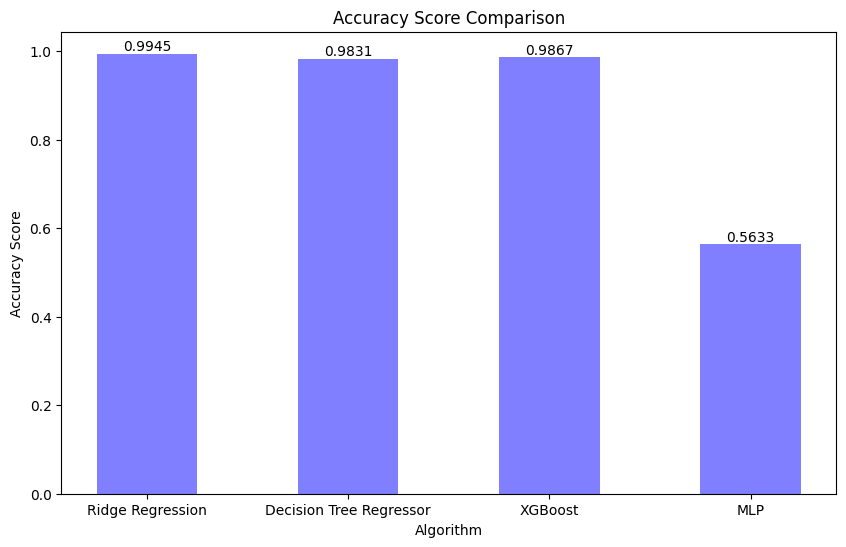

In [16]:
# plot the result
plt.figure(figsize=(10, 6))
bars = plt.bar(myLabels, Accuracy_score, color='#0000FF', alpha=0.5, width=0.5)

# add the number on the top of the bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')
    
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison')
plt.show()

From the comparison result, we can see that Ridge regression and XGBoost got pretty high R2 scores (accuracy score) which are 0.9956 and 0.9906. However, the MLP model only has 0.2162. </br>

Next step, we gonna see the feature importance in Ridge regression and XGBoost, where: </br>
- In Ridge Regression, feature importance can be interpreted through the coefficients </br>
- In XGBoost, feature importance is typically measured through different metrics like feature split frequency and gain

In [17]:
# Ridge Regression coefficients

# Calculate the absolute coefficients, ridge regression can not use feature importance so we use the absolute coefficients
ridge_coef = abs(grid_search1.best_estimator_.coef_)

# Create a DataFrame for the coefficients 
ridge_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': ridge_coef
})


ridge_importance = ridge_importance.sort_values(by='Importance', ascending=False)
print("Ridge Regression Feature Importance:")
print(ridge_importance.head(10))

Ridge Regression Feature Importance:
                     Feature  Importance
3                     Flavor    1.005520
1          Acidity/Structure    1.000316
0                      Aroma    0.994210
2                       Body    0.987423
4                 Aftertaste    0.981830
20          Roast Level_Dark    0.031923
23   Roast Level_Medium-Dark    0.028277
24  Roast Level_Medium-Light    0.026605
6           region_caribbean    0.026104
21         Roast Level_Light    0.025171


In [18]:
# XGBoost feature importance
xgb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': grid_search3.best_estimator_.feature_importances_
})
xgb_importance = xgb_importance.sort_values(by='Importance', ascending=False)
print("\nXGBoost Feature Importance:")
print(xgb_importance.head(10))


XGBoost Feature Importance:
                     Feature  Importance
4                 Aftertaste    0.303173
1          Acidity/Structure    0.286266
0                      Aroma    0.160776
3                     Flavor    0.131054
2                       Body    0.106681
10                  is_blend    0.002161
24  Roast Level_Medium-Light    0.001241
18         whole-bean_Agtron    0.001170
12                 Longitude    0.001126
17  Est. Price USD_per_ounce    0.001071


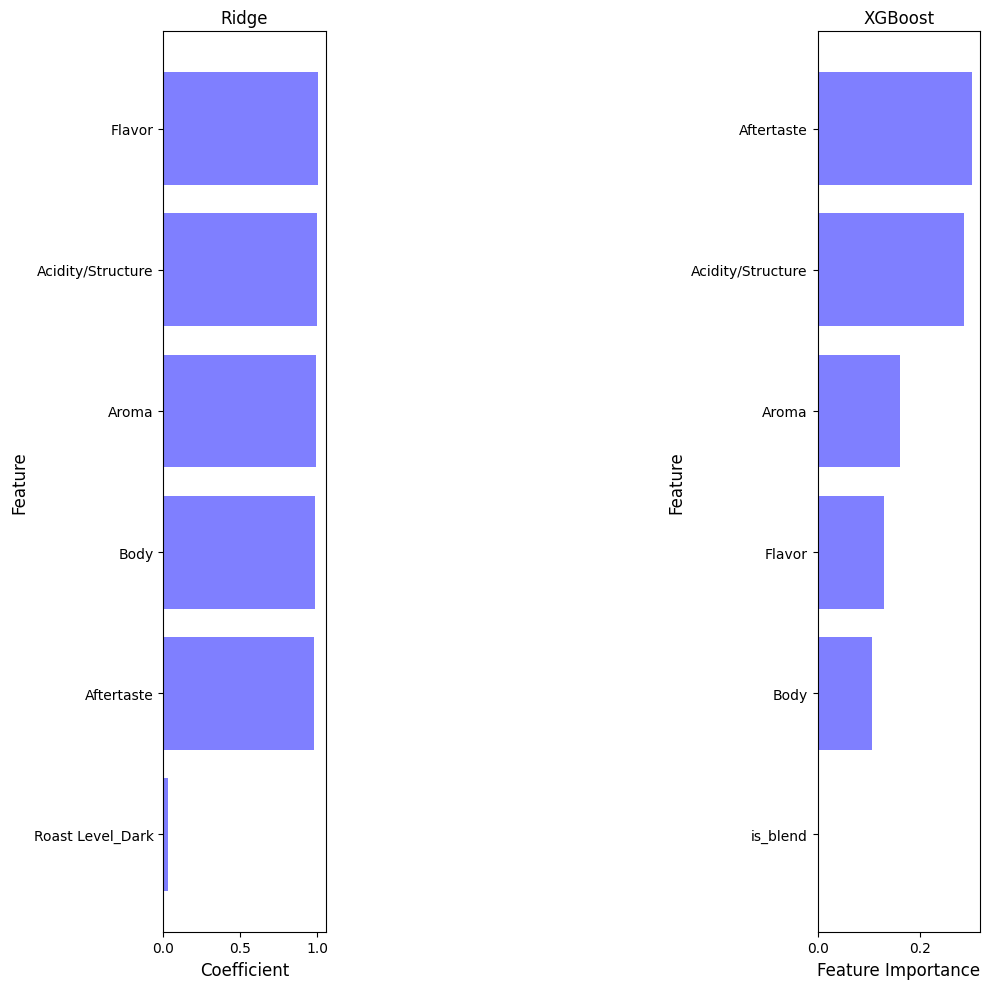

In [19]:
# to compare the feature importance in Ridge regression and XGBoost
plt.figure(figsize=(10, 10))

# only show the top 6 important features
n_features = 6

# Ridge Regression
plt.subplot(131)
plt.barh(ridge_importance['Feature'][:n_features][::-1], 
         ridge_importance['Importance'][:n_features][::-1], color='#0000FF', alpha=0.5)
plt.title('Ridge')
plt.xlabel('Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)


# XGBoost
plt.subplot(133)
plt.barh(xgb_importance['Feature'][:n_features][::-1], 
         xgb_importance['Importance'][:n_features][::-1], color='#0000FF', alpha=0.5)
plt.title('XGBoost')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)

plt.tight_layout()
plt.show()

##### Conclusion #####

0. First, we check the data before doing multiple models.
1. In the modeling, we split the data as training dataset and test dataset (0.65/0.35). This is a regression problem. Here, we used the following models to address this issue:
   - Linear regression (Ridge)
   - Decion tree regressionor
   - XGBoost
   - MLP(Multi-Layer Perceptron Regression)

2. To prevent model overfitting, we use 5-fold cross-validation and use 35% data as test dataset. Also, we use grid search to find the best hyperparameter of each model. We use the R2 score and MAE score as the evaluation of the model.
3. We can see that, ridge regression and XGBoost get high R2 scores which are 0.995617 and 0.990596.
4. At the end, we compare both ridge regression and the XGBoost model and see their feature importance. The top 5 features in both models are the same, though they are in a different order. 